In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("reviews.csv")
df.columns
df.info()
df["TextLenght"] = df["ReviewText"].str.len()
df["WordCount"] = df["ReviewText"].str.split().str.len()
df

# df = df.dropna(subset=["ReviewText"]).reset_index(drop=True)

# df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewText  10 non-null     object
dtypes: object(1)
memory usage: 212.0+ bytes


,ReviewText,TextLenght,WordCount
0,This product is amazing and very useful!,40,7
1,I didn’t like the quality of the material.,42,8
2,Good value for money.,21,4
3,"Terrible experience, won’t buy again.",37,5
4,Absolutely loved it!,20,3
5,The product broke after one week.,33,6
6,Really happy with the performance.,34,5
7,Not worth the price.,20,4
8,Excellent build quality and fast delivery.,42,6
9,Disappointing experience overall.,33,3


In [2]:
allinone = "".join(df["ReviewText"].astype(str))
allinone

'This product is amazing and very useful!I didn’t like the quality of the material.Good value for money.Terrible experience, won’t buy again.Absolutely loved it!The product broke after one week.Really happy with the performance.Not worth the price.Excellent build quality and fast delivery.Disappointing experience overall.'

In [3]:
tokens = df["ReviewText"].str.lower().str.replace(r"[^a-z0-9’]", " ", regex=True).str.split().explode()
tokens

0             this
0          product
0               is
0          amazing
0              and
0             very
0           useful
1                i
1           didn’t
1             like
1              the
1          quality
1               of
1              the
1         material
2             good
2            value
2              for
2            money
3         terrible
3       experience
3            won’t
3              buy
3            again
4       absolutely
4            loved
4               it
5              the
5          product
5            broke
5            after
5              one
5             week
6           really
6            happy
6             with
6              the
6      performance
7              not
7            worth
7              the
7            price
8        excellent
8            build
8          quality
8              and
8             fast
8         delivery
9    disappointing
9       experience
9          overall
Name: ReviewText, dtype: object

In [4]:
wcount = tokens.value_counts()
wcount

ReviewText
the              5
product          2
and              2
experience       2
quality          2
this             1
with             1
broke            1
after            1
one              1
week             1
really           1
happy            1
not              1
performance      1
loved            1
worth            1
price            1
excellent        1
build            1
fast             1
delivery         1
disappointing    1
it               1
buy              1
absolutely       1
again            1
is               1
amazing          1
very             1
useful           1
i                1
didn’t           1
like             1
of               1
material         1
good             1
value            1
for              1
money            1
terrible         1
won’t            1
overall          1
Name: count, dtype: int64

In [5]:
df2 = wcount.head(10).to_frame().reset_index()
df2


,ReviewText,count
0,the,5
1,product,2
2,and,2
3,experience,2
4,quality,2
5,this,1
6,with,1
7,broke,1
8,after,1
9,one,1


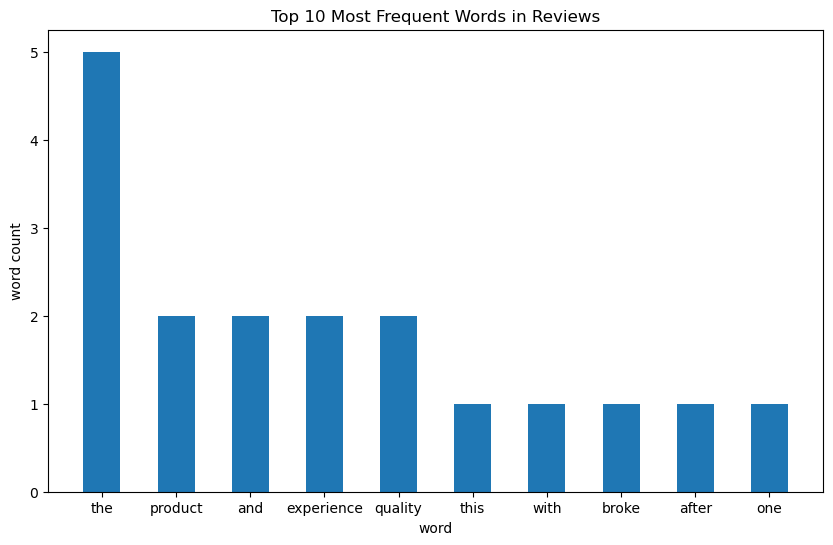

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.bar(df2["ReviewText"] , df2["count"], width= 0.5)
# plt.bar(df2.index, df2.values)
plt.title("Top 10 Most Frequent Words in Reviews")
plt.xlabel("word")
plt.ylabel("word count")
plt.show()